<a href="https://colab.research.google.com/github/ing-LuisHerrera/ClasificadorPrediccionNotasEstudiantes/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cargando e importando las librerias...
import array as arr
import sqlite3 as sql #importanto SQLITE3
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats # importando scipy.stats
import seaborn as sns

In [ ]:
#crea coneccion a la base de datos SQLITE
database = "data/database.db" # seleccionar la Base de datos "database.db"
connection = sql.connect(database)

#Consultas SQL 
queryprincipal = 'SELECT * FROM tbInformacion' # query principal
querysecundario = 'SELECT * FROM tbPrograma' # query secundario

#Consulta SQL uniendo dos tablas
querytablas = 'SELECT rowId, Sub_Codigo, tbPrograma.Programa, Anio, Semestre, asignatura, nombre_asignatura, estado_asignatura, nta1,nta2,nta3,definitiva, nta1Dis, nta2Dis, nta3Dis, definitivaDis, cant_veces_vio_la_materia, nt1EscalaNum, nt2EscalaNum, nt3EscalaNum, defEscalaNum FROM tbInformacion, tbPrograma WHERE tbInformacion.codProgramaAcademico = tbPrograma.cod'

# Consulta SQL rowId donde obtenemos el total de estudiantes en la base de datos
queryRowId = 'SELECT rowId, count(rowId) FROM tbInformacion  GROUP BY rowId'

#consultas por años
queryporAnio1 = 'SELECT * FROM tbInformacion WHERE Anio = 2009' #query año 2009
queryporAnio2 = 'SELECT * FROM tbInformacion WHERE Anio = 2010' #query año 2009
queryporAnio3 = 'SELECT * FROM tbInformacion WHERE Anio = 2011' #query año 2009
queryporAnio4 = 'SELECT * FROM tbInformacion WHERE Anio = 2012' #query año 2009
queryporAnio5 = 'SELECT * FROM tbInformacion WHERE Anio = 2013' #query año 2009
queryporAnio6 = 'SELECT * FROM tbInformacion WHERE Anio = 2014' #query año 2009
queryporAnio7 = 'SELECT * FROM tbInformacion WHERE Anio = 2015' #query año 2009
queryporAnio8 = 'SELECT * FROM tbInformacion WHERE Anio = 2016' #query año 2009
queryporAnio9 = 'SELECT * FROM tbInformacion WHERE Anio = 2017' #query año 2009
queryporAnio10 = 'SELECT * FROM tbInformacion WHERE Anio = 2018' #query año 2009


#consultas por Anio - semestre
queryanio1SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2009 AND Semestre = "A"' #query año 2009 A
queryanio1SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2009 AND Semestre = "B"' #query año 2009 B
queryanio2SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2010 AND Semestre = "A"' #query año 2010 A
queryanio2SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2010 AND Semestre = "B"' #query año 2010 B
queryanio3SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2011 AND Semestre = "A"' #query año 2011 A
queryanio3SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2011 AND Semestre = "B"' #query año 2011 B
queryanio4SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2012 AND Semestre = "A"' #query año 2012 A
queryanio4SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2012 AND Semestre = "B"' #query año 2012 B
queryanio5SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2013 AND Semestre = "A"' #query año 2013 A
queryanio5SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2013 AND Semestre = "B"' #query año 2013 B
queryanio6SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 20014 AND Semestre = "A"' #query año 2014 A
queryanio6SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 20014 AND Semestre = "B"' #query año 2014 B
queryanio7SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2015 AND Semestre = "A"' #query año 2015 A
queryanio7SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2015 AND Semestre = "B"' #query año 2015 B
queryanio8SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2016 AND Semestre = "A"' #query año 2016 A
queryanio8SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2016 AND Semestre = "B"' #query año 2016 B
queryanio9SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2017 AND Semestre = "A"' #query año 2017 A
queryanio9SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2017 AND Semestre = "B"' #query año 2017 B
queryanio10SemestreA = 'SELECT * FROM tbInformacion WHERE Anio = 2018 AND Semestre = "A"' #query año 2018 A
queryanio10SemestreB = 'SELECT * FROM tbInformacion WHERE Anio = 2018 AND Semestre = "B"' #query año 2018 B

In [ ]:
#####################################################################
#####################################################################
####################### Total de estudiantes ########################

cantEst = pd.read_sql_query(queryRowId,connection)
cantTuplas = pd.read_sql_query(querytablas,connection)
totalTuplas = len(cantTuplas)
totalEst = len(cantEst)

print('#####################################################################','\n')
print('Numero de estudiantes en la Base de datos: ',totalEst)
print('La cantidad de registros de los ', totalEst, 'Estudiantes es: ',totalTuplas, '\n')
print('#####################################################################')

##################################################################### 

Numero de estudiantes en la Base de datos:  1216
La cantidad de registros de los  1216 Estudiantes es:  26200 

#####################################################################


In [ ]:

#####################################################################################################################
###################################### Primer Punto del Trabajo  -METODO NORMAL- ####################################

######### Tasa de mortalidad año, semestre, asignaturas

year = 2010
codigoAsig = 4153
######################### Consulta SQL
queryMortalidadGeneric = 'SELECT * FROM tbInformacion WHERE Anio = '+str(year) + ' AND asignatura = '+ str(codigoAsig)

queryperdidos = 'SELECT * FROM tbInformacion WHERE Anio = '+str(year) + ' AND asignatura = '+ str(codigoAsig) + ' AND definitivaDis = "Insuficiente" OR "Deficiente"'



############################# Algoritmo para los datos

curso = pd.read_sql_query(queryMortalidadGeneric, connection)
cursaron = len(curso)

perdieron = pd.read_sql_query(queryperdidos,connection)
cantperdidos = len(perdieron)


print('#####################################################################','\n')
if len(curso) == 0 :
    print("No hay Registros para este año con esta asignatura")
elif len(curso) == 1 :
    print("No se puede hacer el estudio de la mortalidad porque solo tenemos un registro :(")

else:
    print( "Cantidad de estudiantes que perdieron en el ", year ," de la asignatura ", codigoAsig , "Fueron: ", cantperdidos,'\n')
    
    mortalidad = (cantperdidos/cursaron)*100

    print("En el año ",year,"en la asignatura ",codigoAsig,"la mortalidad fue de ", "{:.2f}".format(mortalidad), "%")

##################################################################### 

Cantidad de estudiantes que perdieron en el  2010  de la asignatura  4153 Fueron:  2 

En el año  2010 en la asignatura  4153 la mortalidad fue de  66.67 %


In [ ]:
#####################################################################################################################
###################################### -METODO PARAMETRIZADO- #######################################################

############## Tasa de mortalidad año, semestre, asignaturas

######################### Consulta SQL
queryperdidospro = 'SELECT * FROM tbInformacion WHERE  asignatura = '+ str(codigoAsig) + ' AND definitivaDis = "Insuficiente" OR "Deficiente"'


############################# Algoritmo para los datos
querylimite = pd.read_sql_query(queryperdidospro, connection)
#obteniedo el año inicial y el año final
limiteinicial = np.min(querylimite.Anio)
limiteFinal = np.max(querylimite.Anio)
#obteniendo la cantidad de años
iteraciones = limiteFinal - limiteinicial

anioIterable = limiteinicial
arrgMortalidad = []
arrgAnio = []

print('#####################################################################','\n')
for c in range(0,iteraciones):
    
    queryMortalidadPro = 'SELECT * FROM tbInformacion WHERE Anio = '+str(anioIterable) + ' AND asignatura = '+ str(codigoAsig)
    
    queryperdidospro = 'SELECT * FROM tbInformacion WHERE Anio = '+str(anioIterable) + ' AND asignatura = '+ str(codigoAsig) + ' AND definitivaDis = "Insuficiente" OR "Deficiente"'
    

    datamortalidadpro = pd.read_sql_query(queryMortalidadPro, connection)
    dataperdidospro = pd.read_sql_query(queryperdidospro,connection)
    cantP = len(dataperdidospro)
    cursadospro = len(datamortalidadpro)
    perdidospro = len(queryperdidospro)
    if  cursadospro == 0 :
        print("No hay Registros para este año con esta asignatura",'\n')
    elif cursadospro == 1 :
        print("No se puede hacer el estudio de la mortalidad en el año", anioIterable, "porque solo tenemos un registro :(",'\n')
        print('#####################################################################','\n')
    else:
        
        print( "Cantidad de estudiantes que perdieron en el ", anioIterable ," de la asignatura ", codigoAsig , "Fueron: ", cantP)
        
        mortalidadpro = (cantP/cursadospro)*100

        print("En el año ",anioIterable,"en la asignatura ",codigoAsig,"la mortalidad fue de ", "{:.2f}".format(mortalidadpro), "%", '\n')  
        print('#####################################################################','\n')
        arrgAnio.append(anioIterable)
        arrgMortalidad.append(mortalidadpro)

              
    anioIterable+=1



grafica = pd.DataFrame({'anio': arrgAnio, 'tasa_letalidad': arrgMortalidad})


##################################################################### 

Cantidad de estudiantes que perdieron en el  2010  de la asignatura  4153 Fueron:  2
En el año  2010 en la asignatura  4153 la mortalidad fue de  66.67 % 

##################################################################### 

No se puede hacer el estudio de la mortalidad en el año 2011 porque solo tenemos un registro :( 

##################################################################### 

Cantidad de estudiantes que perdieron en el  2012  de la asignatura  4153 Fueron:  1
En el año  2012 en la asignatura  4153 la mortalidad fue de  50.00 % 

##################################################################### 

Cantidad de estudiantes que perdieron en el  2013  de la asignatura  4153 Fueron:  4
En el año  2013 en la asignatura  4153 la mortalidad fue de  44.44 % 

##################################################################### 

Cantidad de estudiantes que perdieron en el  2014  de la asignatura  4153 

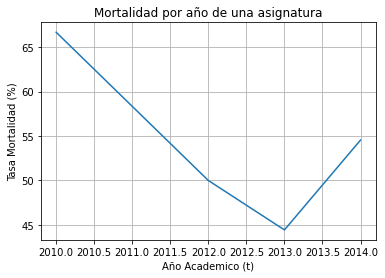

In [ ]:
#####################################################################################################################
############# Grafica de mortalidad por año de la asignatura dada por el usuario ####################################

N=len(grafica)
X=np.zeros([N,1])
Y=np.zeros([N,1])
X[:,0]=grafica.anio
Y[:,0]=grafica.tasa_letalidad

plt.figure()
plt.plot(X,Y)
plt.grid()
plt.title('Mortalidad por año de una asignatura')
plt.xlabel('Año Academico (t)')
plt.ylabel('Tasa Mortalidad (%)')
plt.show()

In [ ]:
#####################################################################################################################
###################################### Segundo Punto del Trabajo  -METODO NORMAL- ####################################

########################## Tasa de mortalidad año, semestre, Programa Academico

yearprograma = 2012 #Año
codigoProg = 22 #Codigo programa


######################### Consultas SQL
queryMortalidadPrograma = 'SELECT * FROM tbInformacion WHERE Anio = '+str(yearprograma) + ' AND codProgramaAcademico = '+ str(codigoProg)

queryperdidosPrograma = 'SELECT * FROM tbInformacion WHERE Anio = '+str(yearprograma) + ' AND codProgramaAcademico = '+ str(codigoProg) + ' AND definitivaDis = "Insuficiente" OR "Deficiente"'



########################################### Algoritmo para los datos

cursoPrograma = pd.read_sql_query(queryMortalidadPrograma, connection)
cursaronPrograma = len(cursoPrograma)

perdieronprograma = pd.read_sql_query(queryperdidosPrograma, connection)
cantperdidosPrograma = len(perdieronprograma)

print('#####################################################################','\n')
if len(cursoPrograma) == 0 :
    print("No hay Registros para este año con este programa" ,'\n')
elif len(cursoPrograma) == 1 :
    print("No se puede hacer el estudio de la mortalidad porque solo tenemos un registro :(" ,'\n')

else:
    print( "Cantidad de estudiantes que perdieron en el ", yearprograma ," del programa ", codigoProg , "Fueron: ", cantperdidosPrograma ,'\n')
    
    mortalidadprograma = (cantperdidosPrograma/cursaronPrograma)*100

    print("En el año ",yearprograma,"el programa ",codigoProg ," tuvo una  mortalidad de ", "{:.2f}".format(mortalidadprograma), "%",'\n')
    print('#####################################################################','\n')


##################################################################### 

Cantidad de estudiantes que perdieron en el  2012  del programa  22 Fueron:  6 

En el año  2012 el programa  22  tuvo una  mortalidad de  33.33 % 

##################################################################### 



In [ ]:
#####################################################################################################################
###################################### -METODO PARAMETRIZADO- #######################################################

############## Tasa de mortalidad año, semestre, programa


############### Consulta SQL
queryperdidosproprograma = 'SELECT * FROM tbInformacion WHERE  codProgramaAcademico = '+ str(codigoProg) + ' AND definitivaDis = "Insuficiente" OR "Deficiente"'

########################################### Algoritmo para los datos

querylimiteprograma = pd.read_sql_query(queryperdidosproprograma, connection)
#obteniedo el año inicial y el año final
limiteinicialprograma = np.min(querylimiteprograma.Anio)
limiteFinalprograma = np.max(querylimiteprograma.Anio)
#obteniendo la cantidad de años
iteracionesprograma = limiteFinalprograma - limiteinicialprograma


anioIterableprograma = limiteinicialprograma
arrgMortalidadprograma = []
arrgAnioprograma = []
print('#####################################################################','\n')
for c in range(0,iteracionesprograma):
    
    queryMortalidadProPrograma = 'SELECT * FROM tbInformacion WHERE Anio = '+str(anioIterableprograma) + ' AND codProgramaAcademico = '+ str(codigoProg)
    
    queryperdidosproPrograma = 'SELECT * FROM tbInformacion WHERE Anio = '+str(anioIterableprograma) + ' AND codProgramaAcademico = '+ str(codigoProg) + ' AND definitivaDis = "Insuficiente" OR "Deficiente"'
    

    datamortalidadproPrograma = pd.read_sql_query(queryMortalidadProPrograma, connection)
    dataperdidosproPrograma = pd.read_sql_query(queryperdidosproPrograma,connection)
    
    cantPprograma = len(dataperdidosproPrograma)
    cursadosproprograma = len(datamortalidadproPrograma)
    perdidosproprograma = len(queryperdidosproPrograma)
    
    if  cursadosproprograma == 0 :
        print("No hay Registros para este año con este Programa Academico",'\n')
    elif cursadosproprograma == 1 :
        print("No se puede hacer el estudio de la mortalidad en el año", anioIterableprograma, "porque solo tenemos un registro :(",'\n')

    else:
        
        print( "Cantidad de estudiantes que perdieron en el ", anioIterableprograma ," del Programa ", codigoProg , "Fueron: ", cantPprograma)
        
        mortalidadprograma = (cantPprograma/cursadosproprograma)*100

        print("En el año ",anioIterableprograma,"en la asignatura ",codigoAsig,"la mortalidad fue de ", "{:.2f}".format(mortalidadprograma), "%", '\n') 
        print('#####################################################################','\n') 
        
        arrgAnioprograma.append(anioIterableprograma)
        arrgMortalidadprograma.append(mortalidadprograma)

              
    anioIterableprograma+=1

graficados = pd.DataFrame({'anio': arrgAnioprograma, 'tasa_letalidad': arrgMortalidadprograma})

##################################################################### 

Cantidad de estudiantes que perdieron en el  2012  del Programa  22 Fueron:  6
En el año  2012 en la asignatura  4153 la mortalidad fue de  33.33 % 

##################################################################### 

Cantidad de estudiantes que perdieron en el  2013  del Programa  22 Fueron:  4
En el año  2013 en la asignatura  4153 la mortalidad fue de  33.33 % 

##################################################################### 

Cantidad de estudiantes que perdieron en el  2014  del Programa  22 Fueron:  12
En el año  2014 en la asignatura  4153 la mortalidad fue de  14.12 % 

##################################################################### 

Cantidad de estudiantes que perdieron en el  2015  del Programa  22 Fueron:  17
En el año  2015 en la asignatura  4153 la mortalidad fue de  6.30 % 

##################################################################### 

Cantidad de estudiantes que perdieron e

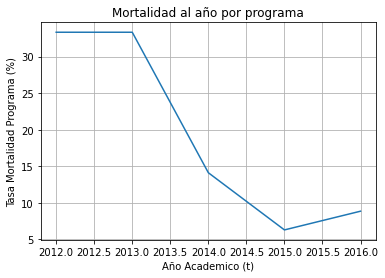

In [ ]:
N=len(graficados)
X=np.zeros([N,1])
Y=np.zeros([N,1])
X[:,0]=graficados.anio
Y[:,0]=graficados.tasa_letalidad

plt.figure()
plt.plot(X,Y)
plt.grid()
plt.title('Mortalidad al año por programa')
plt.xlabel('Año Academico (t)')
plt.ylabel('Tasa Mortalidad Programa (%)')
plt.show()

In [ ]:
#####################################################################################################################
###################################### TERCER Punto del Trabajo  -PREDICCION- ####################################

################ Prediccion

predicAsignatura = 4164 # codigo asignatura
################################# Consulta SQL
querypredicUno = 'select asignatura, Anio, cant_veces_vio_la_materia,nt1EscalaNum,nt2EscalaNum,nt3EscalaNum, defEscalaNum from tbInformacion where asignatura = '+ str(predicAsignatura)

##################### Algoritmo para los datos
dataframePredic = pd.read_sql_query(querypredicUno,connection)
etiqueta = dataframePredic.drop(['asignatura','Anio','nt1EscalaNum','nt2EscalaNum','nt3EscalaNum','defEscalaNum'],axis=1)  # Cantidad de veces que vio la materia
atributos = dataframePredic.drop(['Anio','cant_veces_vio_la_materia','nt2EscalaNum','nt3EscalaNum','defEscalaNum'],axis=1)


clasificador = tree.DecisionTreeClassifier()
clasificador = clasificador.fit(atributos,etiqueta)
nota = 1  # nota 
print('#####################################################################','\n') 
print("para la asignatura ",predicAsignatura,"con la nota del primer corte de ",nota,"probablemente pase al intento numero : ",clasificador.predict([[predicAsignatura,nota]]))


##################################################################### 

para la asignatura  4164 con la nota del primer corte de  1 probablemente pase al intento numero :  [2]


In [ ]:
#####################################################################################################################
###################################### CUARTO Punto del Trabajo  -PREDICCION- #######################################

################ Prediccion

predicAsignatura = 4164
################################# Consulta SQL
querypredicDos = 'select asignatura, nt1EscalaNum,nt2EscalaNum, defEscalaNum from tbInformacion where asignatura = '+ str(predicAsignatura)

################################# Algoritmo de los datos
dataframePredicDos = pd.read_sql_query(querypredicDos,connection)
etiquetados = dataframePredicDos.drop(['asignatura','nt1EscalaNum','nt2EscalaNum'],axis=1)  # Definitiva
atributosdos = dataframePredicDos.drop(['defEscalaNum'],axis=1) # Atributos

################################################  Algoritmo Clasificadores
clasificadordos = tree.DecisionTreeClassifier()
clasificadordos = clasificadordos.fit(atributosdos,etiquetados)
codAsigpredict = 4164
nota1 = 1.5
nota2 = 2.1

prediccion2 = clasificadordos.predict([[codAsigpredict,nota1,nota2]]) 

bandera = float(prediccion2[0])
print('#####################################################################','\n') 
print("Con las dos notas dadas para esta asignatura y sin saber la tercera nota, se predice una nota definitiva aproximadamente de : ",bandera, '\n')


if bandera >= 3 :
    print("Animo parcero puede sacar una Tercera nota buena :D", '\n')
elif bandera < 3 :
    print("Lastima, puedes llegar a repetir la Asignatura :(", '\n')

##################################################################### 

Con las dos notas dadas para esta asignatura y sin saber la tercera nota, se predice una nota definitiva aproximadamente de :  2.0 

Lastima, puedes llegar a repetir la Asignatura :( 



In [ ]:
#####################################################################################################################
###################################### Quinto Punto del Trabajo  -Analisis Estadisticos- ############################

################ Analisis Estadisticos

consultaEstadistica = pd.read_sql_query(querytablas,connection)

anio = 2015
################################# Consulta SQL
queryEstadistica = 'SELECT tbInformacion.rowId, tbPrograma.Programa, tbInformacion.Anio, sum(tbInformacion.definitiva)/count(tbPrograma.Programa) "Promedio_ponderado" FROM tbInformacion, tbPrograma WHERE tbInformacion.codProgramaAcademico = tbPrograma.cod AND Anio = '+str(anio)+ ' GROUP BY (tbPrograma.Programa)'
################################# Algoritmo de los datos
dataframeEstadistica = pd.read_sql_query(queryEstadistica, connection)

dataframeEstadistica.head()

,rowId,Programa,Anio,Promedio_ponderado
0,328472,Ing. Civil,2015,3.191913
1,305679,Ing. Electronica,2015,3.179558
2,325905,Ing. Industrial,2015,3.248318
3,266539,Ing. Mecanica,2015,3.088365
4,319005,Ing. Sistemas,2015,3.255556


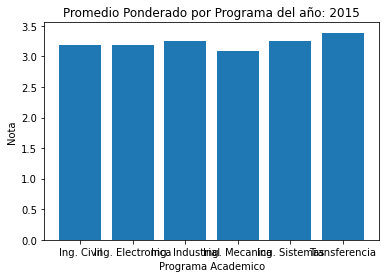

In [ ]:
########################## Grafica de la información
eje_x = dataframeEstadistica.Promedio_ponderado
eje_y = dataframeEstadistica.Programa

plt.figure()
plt.bar(eje_y,eje_x)
plt.title('Promedio Ponderado por Programa del año: '+ str(anio))
plt.xlabel('Programa Academico')
plt.ylabel('Nota')
plt.show()

In [ ]:
queryAnalisisEstadistica = 'SELECT tbPrograma.Programa, sum(tbInformacion.definitiva)/count(tbPrograma.Programa) "Promedio_Ponderado" FROM tbInformacion, tbPrograma WHERE tbInformacion.codProgramaAcademico = tbPrograma.cod GROUP BY (tbPrograma.Programa)'

dataAnalisisEstadistica = pd.read_sql_query(queryAnalisisEstadistica,connection)
dataAnalisisEstadistica.head()

,Programa,Promedio_Ponderado
0,Ing. Civil,3.158158
1,Ing. Electronica,3.233857
2,Ing. Industrial,3.227607
3,Ing. Mecanica,3.108853
4,Ing. Sistemas,3.324074


In [ ]:
############################# Datos Estadisticos

mediana_notas = np.median(dataAnalisisEstadistica.Promedio_Ponderado)
moda_notas = stats.mode(dataAnalisisEstadistica.Promedio_Ponderado)
curtosis_notas = stats.kurtosis(dataAnalisisEstadistica.Promedio_Ponderado)
nota_minima = np.min(dataAnalisisEstadistica.Promedio_Ponderado)
nota_maxima = np.max(dataAnalisisEstadistica.Promedio_Ponderado)

print('\n','\n')
print("************************************************************")
print("************************************************************",'\n')
print("Mediana notas: ",mediana_notas)
print("Moda de notas: ",moda_notas)
print("Curtosis notas: ",curtosis_notas)
print("Minimo notas: ",nota_minima)
print("Maximo notas: ",nota_maxima, '\n')
print("************************************************************")
print("************************************************************")


 

************************************************************
************************************************************ 

Mediana notas:  3.2307318772097124
Moda de notas:  ModeResult(mode=array([3.10885341]), count=array([1]))
Curtosis notas:  -0.926019649155267
Minimo notas:  3.108853410740203
Maximo notas:  3.324074074074074 

************************************************************
************************************************************


In [ ]:
########################## Analisis Estadisticos Historico Asignaturas


##### Consulta SQl
queryHistoricoAsig = 'select nombre_asignatura, count(nombre_asignatura) as conteo from tbInformacion group by nombre_asignatura order by  conteo desc'

########### Algoritmo Datos
dataframeHistoricoAsg = pd.read_sql_query(queryHistoricoAsig, connection)

dataframeHistoricoAsg.head()
 



,nombre_asignatura,conteo
0,FISICA Y MATEMATICAS I,1540
1,ALGEBRA LINEAL,1410
2,FUNDAMENTOS DE MATEMATICAS,1291
3,FISICA Y MATEMATICAS II,1150
4,LECTURA Y ESCRITURA-UNIVERSIDAD II,1109


In [ ]:
##### Consulta SQl

nomAsigmasVista = dataframeHistoricoAsg.iat[1,0]
vecesAsig = dataframeHistoricoAsg.iat[1,1]

print('\n','\n')
print("##########################################################################################",'\n')
print("La asignatura mas cursada historicamente es: ", str(nomAsigmasVista), " con", str(vecesAsig), " vista por los estudiantes" )


 

########################################################################################## 

La asignatura mas cursada historicamente es:  ALGEBRA LINEAL  con 1410  vista por los estudiantes


In [ ]:
##### Consulta SQl
queryHistoricoAsigmenos = 'select nombre_asignatura, count(nombre_asignatura) as conteo from tbInformacion group by nombre_asignatura order by  conteo asc'

########### Algoritmo Datos
dataframeHistoricoAsgmenos = pd.read_sql_query(queryHistoricoAsigmenos, connection)



nomAsigmenosVista = dataframeHistoricoAsgmenos.iat[1,0]
vecesAsigmenos = dataframeHistoricoAsgmenos.iat[1,1]

print('\n','\n')
print("##########################################################################################",'\n')
print("La asignatura menos cursada historicamente es: ", str(nomAsigmenosVista), " con", str(vecesAsigmenos), " vista por los estudiantes" )


 

########################################################################################## 

La asignatura menos cursada historicamente es:  ANALISIS Y DISENO  con 1  vista por los estudiantes


In [ ]:
mediana_Asignatura = np.median(dataframeHistoricoAsg.conteo)
moda_Asignatura = stats.mode(dataframeHistoricoAsg.conteo)
curtosis_Asignatura = stats.kurtosis(dataframeHistoricoAsg.conteo)
asignatura_minima = np.min(dataframeHistoricoAsg.conteo)
asignatura_maxima = np.max(dataframeHistoricoAsg.conteo)

print('\n','\n')
print("************************************************************")
print("************************************************************",'\n')
print("Mediana Asignatura: ",mediana_Asignatura)
print("Moda de Asignaturas: ",moda_Asignatura)
print("Curtosis Asignaturas: ",curtosis_Asignatura)
print("Minimo Asignatura: ",asignatura_minima)
print("Maximo Asignatura: ",asignatura_maxima, '\n')
print("************************************************************")
print("************************************************************")